# <span style="color: red;background-color:green">`Netflix Comprehensive Data Analysis`</span>

## Executive Summary

This project performs a structured exploratory data analysis (EDA) on the Netflix dataset to uncover
content distribution patterns, geographical production trends, and temporal growth dynamics.

This notebook follows a structured workflow:
1. Business Understanding  
2. Data Cleaning  
3. Exploratory Data Analysis  
4. Insight Extraction  
5. Strategic Conclusions  

---

# `Project Objectives`

The goal of this analysis is to provide actionable insights into Netflix's content strategy. We aim to answer the following key business questions:

- Content Strategy: What is the current balance between Movies and TV Shows, and how has this shifted?
- Market Expansion: Which countries are the primary hubs for content production, and where are the emerging markets?
- Audience Segmentation: What is the distribution of content ratings, and is Netflix successfully targeting all age demographics?
- Temporal Dynamics: Is there a specific "sweet spot" (month or day) when Netflix prefers to release new content to maximize engagement?

## `Visualization Configuration`

All plots are standardized using a consistent matplotlib configuration:

In [1]:
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-muted")
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["font.size"] = 11
plt.rcParams["figure.autolayout"] = True

### Library Setup
Importing libraries for data manipulation (Pandas, NumPy) and visualization (Matplotlib, Seaborn).

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

---

## **`Data Loading and Initial Inspection`**
Loading the dataset and performing a basic check on shape and columns.

In [3]:
df = pd.read_csv("netflix.csv")
print(df.shape)

(8807, 12)


In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

---

## **`Data Cleaning and Preprocessing`**
Renaming columns and dropping unnecessary identifiers to streamline the analysis.

In [6]:
df = df.rename(columns={'listed_in': 'genre'})
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genre', 'description'],
      dtype='object')

In [7]:
df = df.drop(columns='show_id')

In [8]:
df.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genre', 'description'],
      dtype='object')

In [9]:
df.isnull().sum()

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
genre              0
description        0
dtype: int64

### droping null values from 'date_added', 'rating' and 'duration' columns because the amount of null values 

### in these columns are insignificant

In [10]:
df = df.dropna(subset= ['date_added', 'rating', 'duration'])

In [11]:
df.isnull().sum()

type               0
title              0
director        2621
cast             825
country          829
date_added         0
release_year       0
rating             0
duration           0
genre              0
description        0
dtype: int64

----

## `Converting date column to datetime format`
Reasons:

    String representations of dates cannot be used for time-based sorting, indexing, or plotting reliably.
    Converting to datetime enables extracting meaningful features, such as year, month, or performing time-series analysis.
    For trend analysis (e.g., titles added per year), the year column is essential.

### `Date Parsing`

Date strings are converted into datetime format to enable chronological analysis
and extraction of year-based trends.

### **`Handling Date Features`**
Converting the 'date_added' column to datetime objects and extracting day, month, and year for temporal analysis.

In [12]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['date_added'].isnull().sum()

88

In [13]:
df = df.dropna(subset= ['date_added'])
df['date_added'].isnull().sum()

0

In [14]:
df['day'] = df['date_added'].dt.day
df['month'] = df['date_added'].dt.month
df['year'] = df['date_added'].dt.year
df['month_name'] = df['date_added'].dt.month_name()
df['weekday'] = df['date_added'].dt.day_name()
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,day,month,year,month_name,weekday
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24,9,2021,September,Friday
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24,9,2021,September,Friday
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24,9,2021,September,Friday


---

In [15]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

---
here we recode the ratings into more readable categories because The raw rating field contains many inconsistent, regional, or detailed labels (e.g., 'TV-MA', 'NR', 'PG-13', '16+ (UK)', 'All').

Why recode:

    To create stable, interpretable audience buckets (for example: kids, teens, young_adult, adult)
    To reduce sparsity caused by many low-frequency, region-specific labels
    To enable comparative analysis and modeling on consistent categories

### `Rating Categorization`

Detailed rating labels are grouped into broader audience segments.
This reduces sparsity and allows clearer demographic segmentation.

### **`Rating Consolidation`**
Grouping various rating codes into broader, more intuitive categories: Kids, Teens, and Adults.

In [16]:
df['rating'] = df['rating'].replace(['TV-Y','TV-Y7','G','TV-G','PG','TV-PG','TV-Y7-FV'],'Kids')
df['rating'] = df['rating'].replace(['PG-13','TV-14'],'Teens')
df['rating'] = df['rating'].replace(['R','TV-MA','NC-17'],'Adults')
df['rating'] = df['rating'].replace(['NR','UR'],np.nan)
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,day,month,year,month_name,weekday
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,Teens,90 min,Documentaries,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,Adults,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24,9,2021,September,Friday
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,Adults,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24,9,2021,September,Friday
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24,9,2021,September,Friday


In [17]:
df['rating'].unique()

array(['Teens', 'Adults', 'Kids', nan], dtype=object)

In [18]:
df['rating'].isnull().sum()

81

In [19]:
df.dropna(subset= ['rating'], inplace=True)
df['rating'].isnull().sum()

0

In [20]:
null = df.isna().sum()

In [21]:
null

type               0
title              0
director        2535
cast             800
country          826
date_added         0
release_year       0
rating             0
duration           0
genre              0
description        0
day                0
month              0
year               0
month_name         0
weekday            0
dtype: int64

---

In [22]:
df[(df['director'].isna()) & (df['country'].isna()) & (df['cast'].isna())].shape[0]

96

### deleting rows where all null values are common

In [23]:
df.dropna(subset= ['director' , 'country', 'cast'], how= 'all', inplace=True)
df.shape

(8525, 16)

In [24]:
df['cast'][2]

'Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera'

## `Cast Normalization and Reshaping`

The cast column contains multiple actors per title in a comma-separated string format.

#### Why This Transformation Is Important

-Enables actor-level frequency analysis.

-Allows identification of the most frequent performers.

-Makes it possible to analyze actor collaborations.

-Necessary for building cast-based recommendation features.

### `Cast Expansion`

The cast column is normalized to one actor per row.
This allows proper actor-level counting and avoids inflated string-based counts.

## **`Advanced Data Transformation: Exploding Multi-valued Columns`**
Many titles have multiple cast members, genres, and directors. We explode these columns to allow for per-individual and per-genre analysis.

In [25]:
df_cast = pd.DataFrame(df['cast'].apply(lambda x: str(x).split(", ")).tolist(), index=df['title'])
df_cast

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
title,,,,,,,,,,,,,,,,,,,,,
Dick Johnson Is Dead,nan,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Blood & Water,Ama Qamata,Khosi Ngema,Gail Mabalane,Thabang Molaba,Dillon Windvogel,Natasha Thahane,Arno Greeff,Xolile Tshabalala,Getmore Sithole,Cindy Mahlangu,...,None,None,None,None,None,None,None,None,None,None
Ganglands,Sami Bouajila,Tracy Gotoas,Samuel Jouy,Nabiha Akkari,Sofia Lesaffre,Salim Kechiouche,Noureddine Farihi,Geert Van Rampelberg,Bakary Diombera,None,...,None,None,None,None,None,None,None,None,None,None
Kota Factory,Mayur More,Jitendra Kumar,Ranjan Raj,Alam Khan,Ahsaas Channa,Revathi Pillai,Urvi Singh,Arun Kumar,None,None,...,None,None,None,None,None,None,None,None,None,None
Midnight Mass,Kate Siegel,Zach Gilford,Hamish Linklater,Henry Thomas,Kristin Lehman,Samantha Sloyan,Igby Rigney,Rahul Kohli,Annarah Cymone,Annabeth Gish,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zinzana,Ali Suliman,Saleh Bakri,Yasa,Ali Al-Jabri,Mansoor Alfeeli,Ahd,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Zodiac,Mark Ruffalo,Jake Gyllenhaal,Robert Downey Jr.,Anthony Edwards,Brian Cox,Elias Koteas,Donal Logue,John Carroll Lynch,Dermot Mulroney,Chloë Sevigny,...,None,None,None,None,None,None,None,None,None,None
Zombieland,Jesse Eisenberg,Woody Harrelson,Emma Stone,Abigail Breslin,Amber Heard,Bill Murray,Derek Graf,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [26]:
df_cast = df_cast.stack()
df_cast

title                  
Dick Johnson Is Dead  0                      nan
Blood & Water         0               Ama Qamata
                      1              Khosi Ngema
                      2            Gail Mabalane
                      3           Thabang Molaba
                                   ...          
Zubaan                3         Manish Chaudhary
                      4             Meghna Malik
                      5            Malkeet Rauni
                      6           Anita Shabdish
                      7    Chittaranjan Tripathy
Length: 63644, dtype: object

In [27]:
df_cast = pd.DataFrame(df_cast)
df_cast

0
title                                        
Dick Johnson Is Dead 0                    nan
Blood & Water        0             Ama Qamata
                     1            Khosi Ngema
                     2          Gail Mabalane
                     3         Thabang Molaba
...                                       ...
Zubaan               3       Manish Chaudhary
                     4           Meghna Malik
                     5          Malkeet Rauni
                     6         Anita Shabdish
                     7  Chittaranjan Tripathy

[63644 rows x 1 columns]

In [28]:
df_cast.reset_index(inplace=True)

In [29]:
df_cast

,title,level_1,0
0,Dick Johnson Is Dead,0,nan
1,Blood & Water,0,Ama Qamata
2,Blood & Water,1,Khosi Ngema
3,Blood & Water,2,Gail Mabalane
4,Blood & Water,3,Thabang Molaba
...,...,...,...
63639,Zubaan,3,Manish Chaudhary
63640,Zubaan,4,Meghna Malik
63641,Zubaan,5,Malkeet Rauni
63642,Zubaan,6,Anita Shabdish


In [30]:
df_cast = df_cast[['title', 0]]
df_cast

,title,0
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
63639,Zubaan,Manish Chaudhary
63640,Zubaan,Meghna Malik
63641,Zubaan,Malkeet Rauni
63642,Zubaan,Anita Shabdish


In [31]:
df_cast.columns = ['title', 'cast']
df_cast

,title,cast
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
63639,Zubaan,Manish Chaudhary
63640,Zubaan,Meghna Malik
63641,Zubaan,Malkeet Rauni
63642,Zubaan,Anita Shabdish


In [32]:
df_cast = df_cast.replace('nan', np.nan)
df_cast.isna().sum()

title      0
cast     704
dtype: int64

---

## `Genre Normalization and Reshaping`

This section restructures the genre column to enable genre-level analysis.

The original genre field contains multiple comma-separated values within a single cell (e.g., "Drama, International Movies"). That structure prevents accurate frequency counting, grouping, or aggregation at the individual genre level.

### Genre Normalization

The `genre` column contains multiple comma-separated values per title.
It is reshaped into long format so each row represents one (title, genre) pair.
This prevents combined genre strings from distorting frequency analysis.

In [33]:
df_genre = pd.DataFrame(df['genre'].apply(lambda x: str(x).split(', ')).tolist(), index=df['title'])
df_genre = df_genre.stack()
df_genre = pd.DataFrame(df_genre)
df_genre.reset_index(inplace=True)
df_genre = df_genre[['title', 0]]
df_genre.columns = ['title', 'genre']
df_genre.replace('nan', np.nan, inplace=True)
df_genre.isna().sum()

title    0
genre    0
dtype: int64

---

## `Director Normalization and Reshaping`

The director column, like genre, contains multiple comma-separated values within a single cell (e.g., "Director A, Director B"). This prevents accurate aggregation and frequency analysis at the individual director level.

### `Director Restructuring`

Multiple directors listed in a single cell are separated into individual rows.
This enables accurate aggregation and identification of prolific directors.

In [34]:
df_director = pd.DataFrame(df['director'].apply(lambda x: str(x).split(', ')).tolist(), index=df['title'])
df_director = df_director.stack()
df_director = pd.DataFrame(df_director)
df_director.reset_index(inplace=True)
df_director = df_director[['title', 0]]
df_director.columns = ['title', 'director']
df_director.replace('nan', np.nan, inplace=True)
df_director.isna().sum()

title          0
director    2439
dtype: int64

---

## `Country Normalization and Reshaping`

The country column often contains multiple production countries per title (e.g., "United States, India").

Analytical Objective

Convert multi-country strings into a normalized long format where each row represents one (title, country) pair.

Why This Is Structurally Important

Accurate country-level content distribution analysis.

Proper ranking of top producing countries.

Ability to analyze cross-country co-productions.

Enables geographic clustering or segmentation later.

If not normalized:

Co-produced titles would bias country counts.

Group-by operations would treat "US, India" as a single artificial country.

### `Country Normalization`

Titles produced in multiple countries are separated into individual rows.
This ensures country-level production statistics are accurate.

In [35]:
df_country = pd.DataFrame(df['country'].apply(lambda x: str(x).split(', ')).tolist(), index=df['title'])
df_country = df_country.stack()
df_country = pd.DataFrame(df_country)
df_country.reset_index(inplace=True)
df_country = df_country[['title', 0]]
df_country.columns = ['title', 'country']
df_country.replace('nan', np.nan, inplace=True)
df_country.isna().sum()

title        0
country    730
dtype: int64

---

In [36]:
df12 = df_cast.merge(df_genre, on = 'title')
df12

,title,cast,genre
0,Dick Johnson Is Dead,NaN,Documentaries
1,Blood & Water,Ama Qamata,International TV Shows
2,Blood & Water,Ama Qamata,TV Dramas
3,Blood & Water,Ama Qamata,TV Mysteries
4,Blood & Water,Khosi Ngema,International TV Shows
...,...,...,...
146662,Zubaan,Anita Shabdish,International Movies
146663,Zubaan,Anita Shabdish,Music & Musicals
146664,Zubaan,Chittaranjan Tripathy,Dramas
146665,Zubaan,Chittaranjan Tripathy,International Movies


In [37]:
df123 = df_director.merge(df12, on= 'title')
df123

,title,director,cast,genre
0,Dick Johnson Is Dead,Kirsten Johnson,NaN,Documentaries
1,Blood & Water,NaN,Ama Qamata,International TV Shows
2,Blood & Water,NaN,Ama Qamata,TV Dramas
3,Blood & Water,NaN,Ama Qamata,TV Mysteries
4,Blood & Water,NaN,Khosi Ngema,International TV Shows
...,...,...,...,...
158309,Zubaan,Mozez Singh,Anita Shabdish,International Movies
158310,Zubaan,Mozez Singh,Anita Shabdish,Music & Musicals
158311,Zubaan,Mozez Singh,Chittaranjan Tripathy,Dramas
158312,Zubaan,Mozez Singh,Chittaranjan Tripathy,International Movies


In [38]:
df1234 = df_country.merge(df123, on = 'title')
df1234

,title,country,director,cast,genre
0,Dick Johnson Is Dead,United States,Kirsten Johnson,NaN,Documentaries
1,Blood & Water,South Africa,NaN,Ama Qamata,International TV Shows
2,Blood & Water,South Africa,NaN,Ama Qamata,TV Dramas
3,Blood & Water,South Africa,NaN,Ama Qamata,TV Mysteries
4,Blood & Water,South Africa,NaN,Khosi Ngema,International TV Shows
...,...,...,...,...,...
198399,Zubaan,India,Mozez Singh,Anita Shabdish,International Movies
198400,Zubaan,India,Mozez Singh,Anita Shabdish,Music & Musicals
198401,Zubaan,India,Mozez Singh,Chittaranjan Tripathy,Dramas
198402,Zubaan,India,Mozez Singh,Chittaranjan Tripathy,International Movies


In [39]:
df_new = df.merge(df1234, on= 'title')
df_new

,type,title,director_x,cast_x,country_x,date_added,release_year,rating,duration,genre_x,description,day,month,year,month_name,weekday,country_y,director_y,cast_y,genre_y
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,Teens,90 min,Documentaries,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday,United States,Kirsten Johnson,NaN,Documentaries
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Ama Qamata,International TV Shows
2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Ama Qamata,TV Dramas
3,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Ama Qamata,TV Mysteries
4,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Khosi Ngema,International TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198399,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,Teens,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2,3,2019,March,Saturday,India,Mozez Singh,Anita Shabdish,International Movies
198400,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,Teens,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2,3,2019,March,Saturday,India,Mozez Singh,Anita Shabdish,Music & Musicals
198401,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,Teens,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2,3,2019,March,Saturday,India,Mozez Singh,Chittaranjan Tripathy,Dramas
198402,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,Teens,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2,3,2019,March,Saturday,India,Mozez Singh,Chittaranjan Tripathy,International Movies


---

In [40]:
df_new.drop(columns= ['country_x', 'cast_x', 'director_x', 'genre_x'], inplace=True)
df_new.rename(columns= {'country_y': 'country', 'director_y': 'director', 'cast_y':'cast', 'genre_y': 'genre'}, inplace=True)
df_new.head()

,type,title,date_added,release_year,rating,duration,description,day,month,year,month_name,weekday,country,director,cast,genre
0,Movie,Dick Johnson Is Dead,2021-09-25,2020,Teens,90 min,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday,United States,Kirsten Johnson,NaN,Documentaries
1,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Ama Qamata,International TV Shows
2,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Ama Qamata,TV Dramas
3,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Ama Qamata,TV Mysteries
4,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Khosi Ngema,International TV Shows


In [41]:
df_new.shape

(198404, 16)

In [42]:
df_new.isna().sum()

type                0
title               0
date_added          0
release_year        0
rating              0
duration            0
description         0
day                 0
month               0
year                0
month_name          0
weekday             0
country         11699
director        48645
cast             1882
genre               0
dtype: int64

In [43]:
df_new['cast'] = df_new['cast'].replace(np.nan, 'Unknown')
df_new['country'] = df_new['country'].replace(np.nan, 'Unknown')
df_new['director'] = df_new['director'].replace(np.nan, 'Unknown')

In [44]:
df_new.head()

,type,title,date_added,release_year,rating,duration,description,day,month,year,month_name,weekday,country,director,cast,genre
0,Movie,Dick Johnson Is Dead,2021-09-25,2020,Teens,90 min,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday,United States,Kirsten Johnson,Unknown,Documentaries
1,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Ama Qamata,International TV Shows
2,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Ama Qamata,TV Dramas
3,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Ama Qamata,TV Mysteries
4,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Khosi Ngema,International TV Shows


In [45]:
df_new.shape

(198404, 16)

In [46]:
df_new.isna().sum()

type            0
title           0
date_added      0
release_year    0
rating          0
duration        0
description     0
day             0
month           0
year            0
month_name      0
weekday         0
country         0
director        0
cast            0
genre           0
dtype: int64

In [47]:
df_new.duplicated().sum()

55

In [48]:
df_new.drop_duplicates(keep='first', inplace=True)
df_new.shape

(198349, 16)

---

## **`Segmenting the Data`**
Splitting the processed dataset into two distinct dataframes: one for Movies and one for TV Shows.

### creating 2 more dataframes for better analysis by dividing the present dataframe on the basis
### of type i.e --- Movies and tv  to df_movie and df_tvs

In [49]:
df_movies = df_new.loc[df_new['type'] == 'Movie']
df_tvs = df_new.loc[df_new['type'] == 'TV Show']
df_movies.shape

(144240, 16)

In [50]:
df_tvs.shape

(54109, 16)

In [51]:
df_movies['duration'].unique()

array(['90 min', '91 min', '125 min', '104 min', '127 min', '67 min',
       '94 min', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '110 min', '105 min', '96 min',
       '124 min', '116 min', '98 min', '23 min', '115 min', '122 min',
       '99 min', '88 min', '100 min', '102 min', '93 min', '95 min',
       '85 min', '83 min', '113 min', '13 min', '182 min', '48 min',
       '145 min', '87 min', '92 min', '80 min', '117 min', '128 min',
       '119 min', '143 min', '114 min', '118 min', '108 min', '63 min',
       '121 min', '142 min', '154 min', '120 min', '82 min', '109 min',
       '101 min', '86 min', '229 min', '76 min', '89 min', '156 min',
       '112 min', '107 min', '129 min', '135 min', '136 min', '165 min',
       '150 min', '133 min', '70 min', '84 min', '140 min', '78 min',
       '64 min', '59 min', '139 min', '69 min', '148 min', '189 min',
       '141 min', '130 min', '138 min', '81 min', '132 min', '123 min',
       '65

In [52]:
df_movies['duration'] = df_movies['duration'].str.replace('min', "")
df_movies.head()

C:\Users\JUNAID\AppData\Local\Temp\ipykernel_10840\893356565.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['duration'] = df_movies['duration'].str.replace('min', "")


,type,title,date_added,release_year,rating,duration,description,day,month,year,month_name,weekday,country,director,cast,genre
0,Movie,Dick Johnson Is Dead,2021-09-25,2020,Teens,90,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday,United States,Kirsten Johnson,Unknown,Documentaries
157,Movie,My Little Pony: A New Generation,2021-09-24,2021,Kids,91,Equestria's divided. But a bright-eyed hero be...,24,9,2021,September,Friday,Unknown,Robert Cullen,Vanessa Hudgens,Children & Family Movies
158,Movie,My Little Pony: A New Generation,2021-09-24,2021,Kids,91,Equestria's divided. But a bright-eyed hero be...,24,9,2021,September,Friday,Unknown,Robert Cullen,Kimiko Glenn,Children & Family Movies
159,Movie,My Little Pony: A New Generation,2021-09-24,2021,Kids,91,Equestria's divided. But a bright-eyed hero be...,24,9,2021,September,Friday,Unknown,Robert Cullen,James Marsden,Children & Family Movies
160,Movie,My Little Pony: A New Generation,2021-09-24,2021,Kids,91,Equestria's divided. But a bright-eyed hero be...,24,9,2021,September,Friday,Unknown,Robert Cullen,Sofia Carson,Children & Family Movies


In [53]:
df_tvs['duration'] = df_tvs['duration'].str.replace('Seasons', "")
df_tvs['duration'] = df_tvs['duration'].str.replace('Season', "")
df_tvs.head()

C:\Users\JUNAID\AppData\Local\Temp\ipykernel_10840\2429767909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tvs['duration'] = df_tvs['duration'].str.replace('Seasons', "")
C:\Users\JUNAID\AppData\Local\Temp\ipykernel_10840\2429767909.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tvs['duration'] = df_tvs['duration'].str.replace('Season', "")


,type,title,date_added,release_year,rating,duration,description,day,month,year,month_name,weekday,country,director,cast,genre
1,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Ama Qamata,International TV Shows
2,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Ama Qamata,TV Dramas
3,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Ama Qamata,TV Mysteries
4,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Khosi Ngema,International TV Shows
5,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Khosi Ngema,TV Dramas


In [54]:
df_tvs.rename(columns={'duration': 'seasons'}, inplace=True)

C:\Users\JUNAID\AppData\Local\Temp\ipykernel_10840\2687204880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tvs.rename(columns={'duration': 'seasons'}, inplace=True)


In [55]:
df_tvs.head()

,type,title,date_added,release_year,rating,seasons,description,day,month,year,month_name,weekday,country,director,cast,genre
1,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Ama Qamata,International TV Shows
2,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Ama Qamata,TV Dramas
3,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Ama Qamata,TV Mysteries
4,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Khosi Ngema,International TV Shows
5,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Khosi Ngema,TV Dramas


---

### **`1. Content Type Distribution`**
We start our EDA by looking at the overall split between Movies and TV Shows. This pie chart illustrates the dominance of one format over the other.

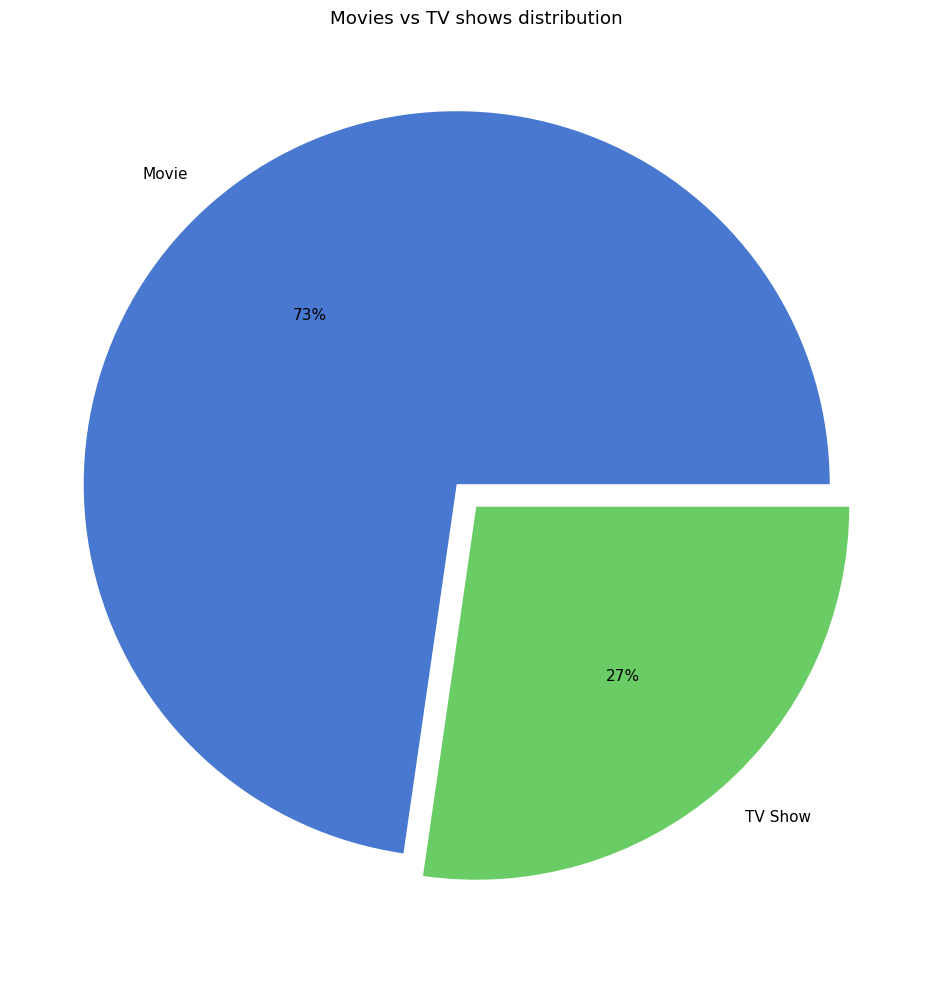

In [56]:
plt.figure(figsize=(15,10))
plt.pie(df_new['type'].value_counts(), labels=df_new['type'].value_counts().index, explode=(0.08, 0), autopct= '%0.0f%%')
plt.suptitle('Movies vs TV shows distribution')
plt.show()

### **`2. Geographical Insights: Top Countries`**
Here, we identify the top 10 countries contributing to Netflix's library. This helps understand the platform's focus on specific international markets.

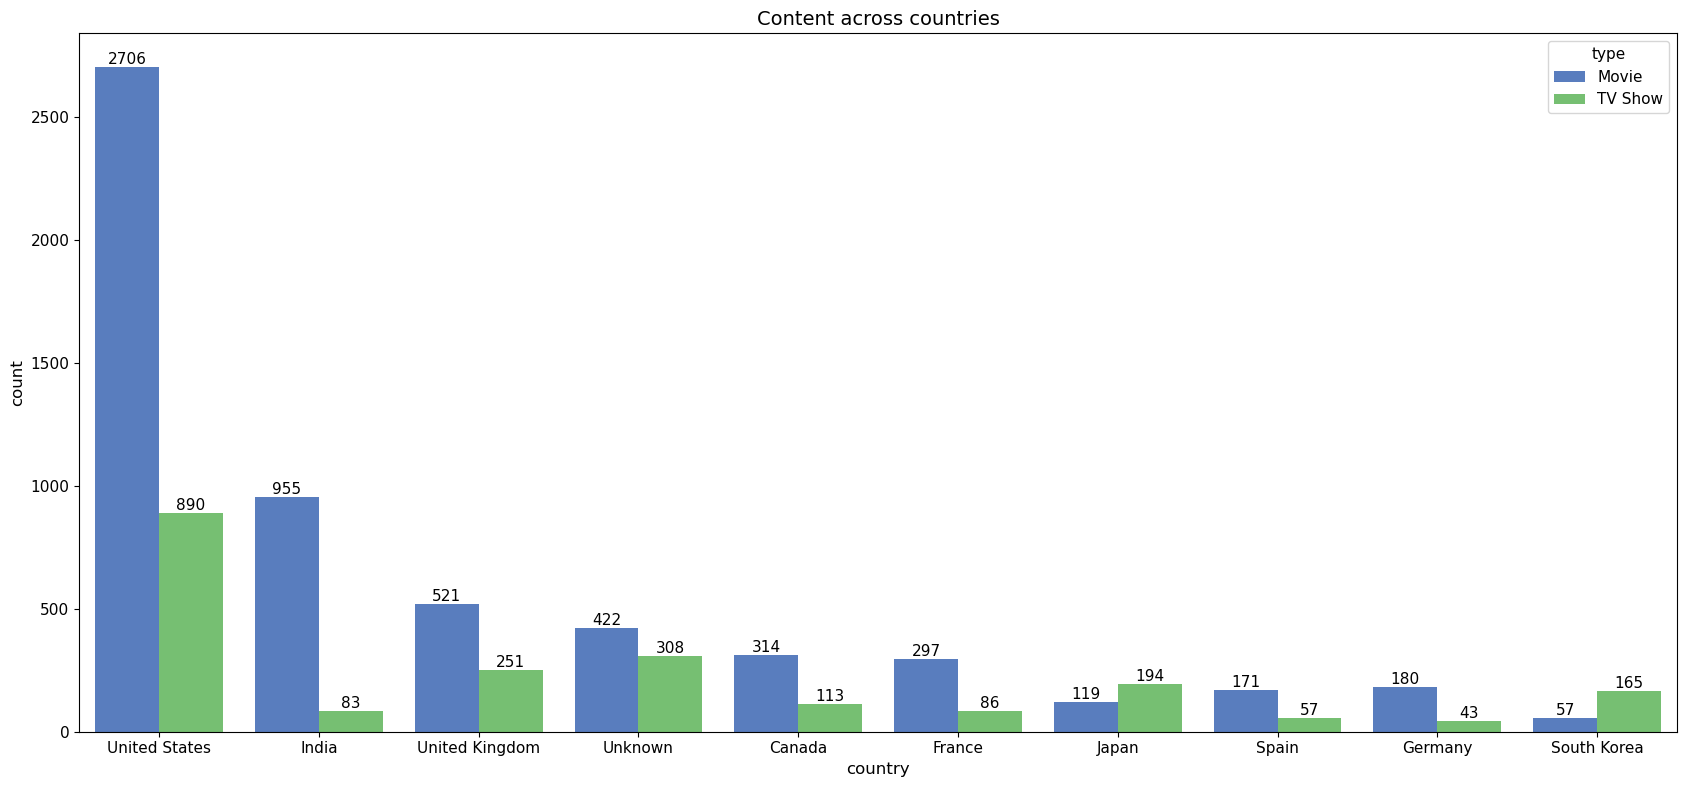

In [57]:
df_temp = df_new.drop_duplicates(subset= ['country', 'title'])
x = df_temp['country'].value_counts().head(10)

plt.figure(figsize= (17,8))
plt.title('Content across countries')
label = sns.countplot(data = df_temp, x = 'country', hue= 'type', order=x.index)

for i in label.containers:
    label.bar_label(i)
plt.show()

### **`3. Content Creators: Top Directors`**
In this section, we visualize the most prolific directors on the platform, segmented by Movies and TV Shows.

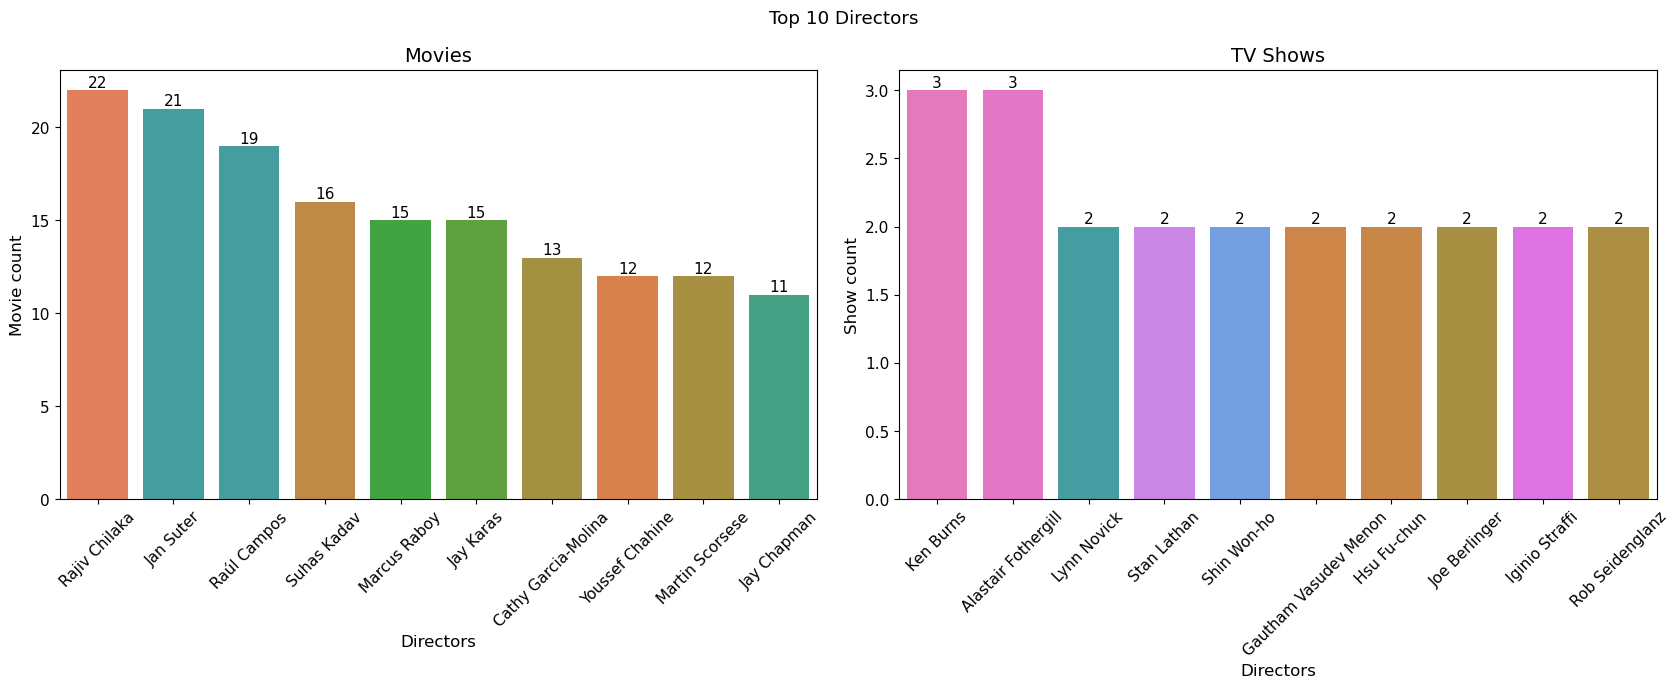

In [58]:
df_movies_temp = df_movies.drop_duplicates(subset= ['director', 'title'])
df_tvs_temp = df_tvs.drop_duplicates(subset= ['director', 'title'])

plt.figure(figsize=(17,7))
plt.suptitle('Top 10 Directors')

plt.subplot(1,2,1)
label = sns.countplot(data=df_movies_temp, x = 'director', order=df_movies_temp['director'].value_counts()[1:11].index, hue= 'director', palette= "husl")
for i in label.containers:
    label.bar_label(i)
plt.title("Movies")
plt.xticks(rotation = 45)
plt.xlabel('Directors')
plt.ylabel('Movie count')

plt.subplot(1,2,2)
label = sns.countplot(data=df_tvs_temp, x = 'director', order=df_tvs_temp['director'].value_counts()[1:11].index, hue= 'director', palette= "husl")
for i in label.containers:
    label.bar_label(i)
plt.title("TV Shows")
plt.xticks(rotation = 45)
plt.xlabel('Directors')
plt.ylabel('Show count')

plt.show()

### **`4. Popular Genres`**
This visualization highlights the most frequent genres. It provides insight into the kind of content Netflix prioritizes for its subscribers.

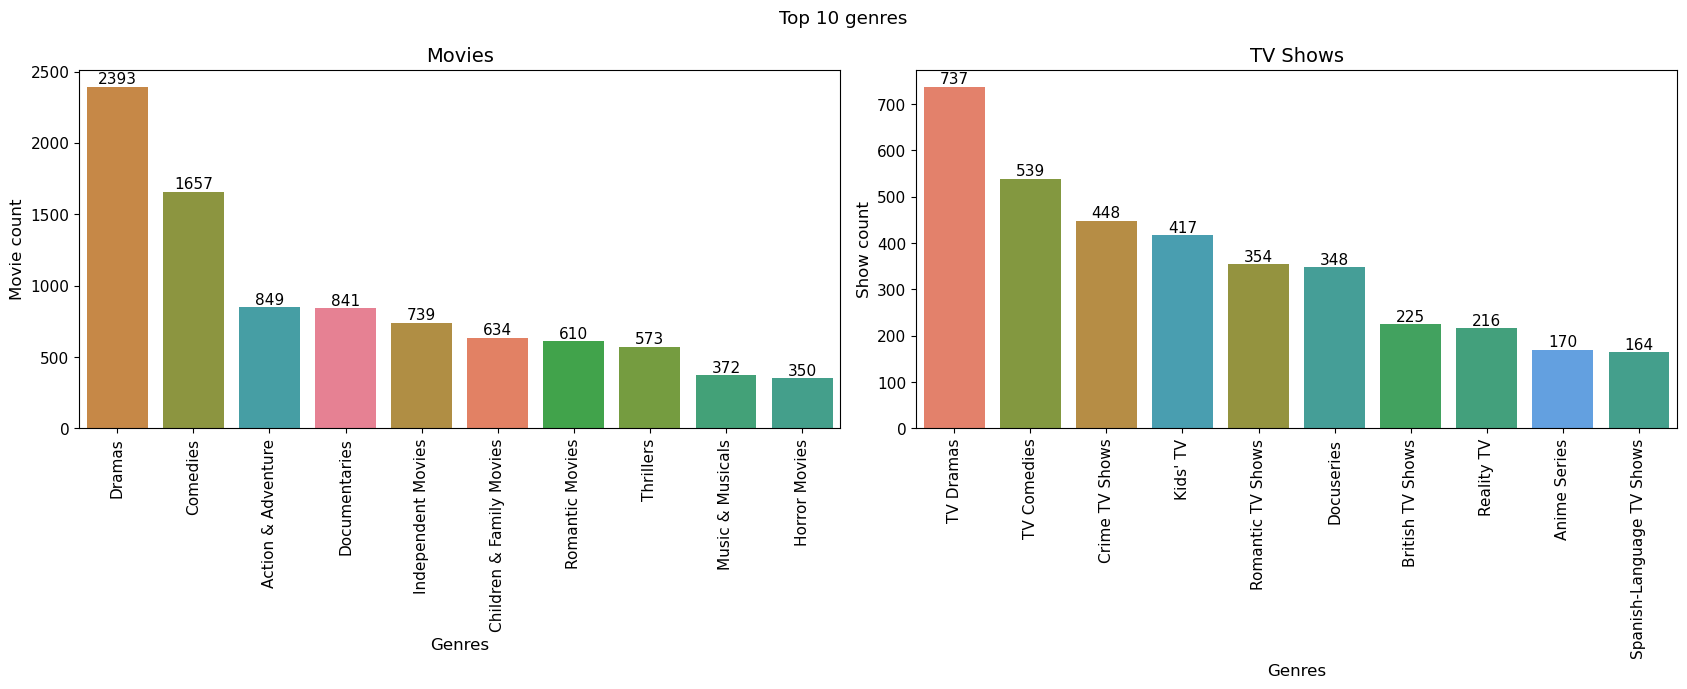

In [59]:
df_movies_temp = df_movies.drop_duplicates(subset= ['genre', 'title'])
df_tvs_temp = df_tvs.drop_duplicates(subset= ['genre', 'title'])

plt.figure(figsize=(17,7))
plt.suptitle('Top 10 genres')

plt.subplot(1,2,1)
label = sns.countplot(data=df_movies_temp, x = 'genre', order=df_movies_temp['genre'].value_counts()[1:11].index, hue= 'genre', palette= "husl")
for i in label.containers:
    label.bar_label(i)
plt.title("Movies")
plt.xticks(rotation = 90)
plt.xlabel('Genres')
plt.ylabel('Movie count')

plt.subplot(1,2,2)
label = sns.countplot(data=df_tvs_temp, x = 'genre', order=df_tvs_temp['genre'].value_counts()[1:11].index, hue= 'genre', palette= "husl")
for i in label.containers:
    label.bar_label(i)
plt.title("TV Shows")
plt.xticks(rotation = 90)
plt.xlabel('Genres')
plt.ylabel('Show count')

plt.show()

### **`5. Genre Comparison: Movies vs. TV Shows`**
A deeper look into the top genres across both content types using a stacked comparison to see if certain genres are unique to a format.

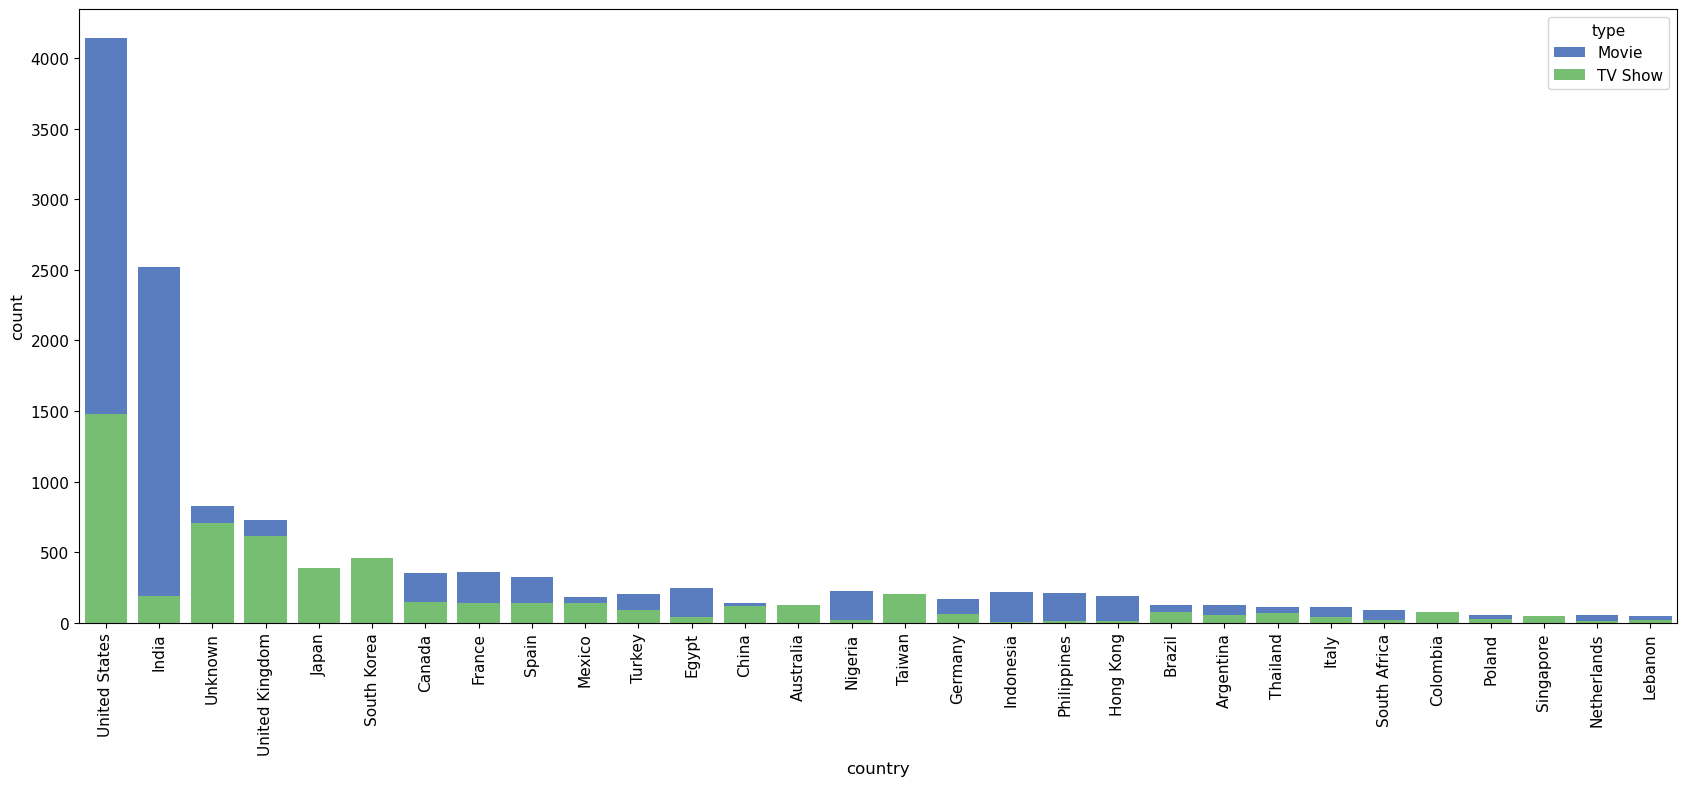

In [60]:
#stacked graph

df_temp = df_new.drop_duplicates(subset= ['genre', 'title'])
plt.figure(figsize=(17,8))
plt.xticks(rotation= 90)
sns.countplot(data = df_temp, x = 'country', hue = 'type', dodge= False, order= df_temp['country'].value_counts().head(30).index)
plt.show()

In [61]:
df_new.isna().sum()

type            0
title           0
date_added      0
release_year    0
rating          0
duration        0
description     0
day             0
month           0
year            0
month_name      0
weekday         0
country         0
director        0
cast            0
genre           0
dtype: int64

### **`6. Audience Targeting: Content Ratings`**
We analyze the distribution of content across different rating categories ('Adults', 'Teens', 'Kids') to understand the target demographic of the library.

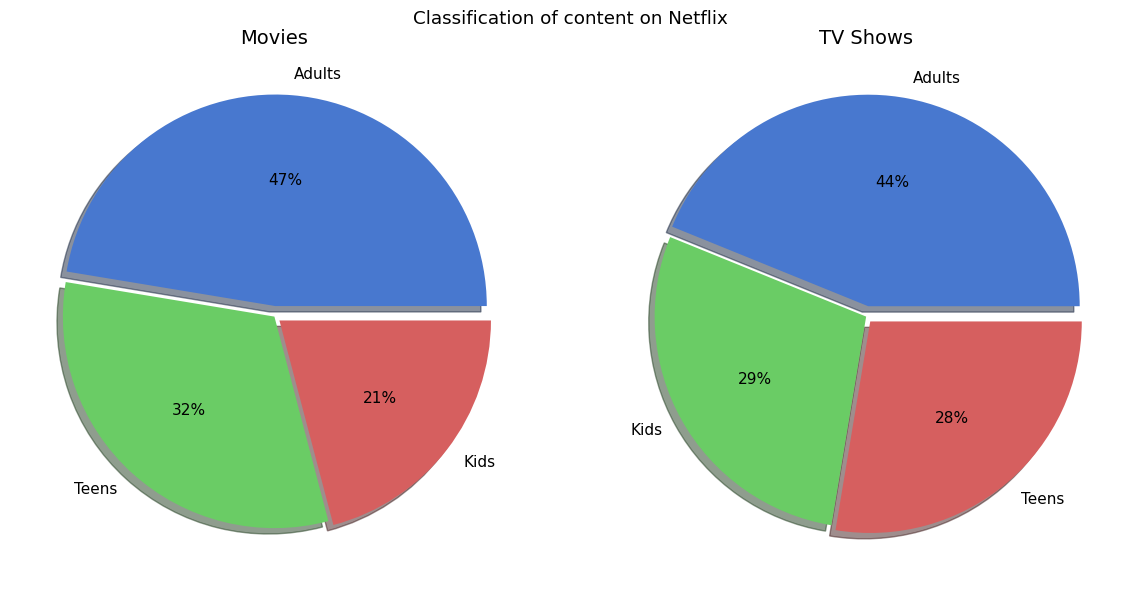

In [62]:
df_movies_temp = df_movies.drop_duplicates(subset= ['rating', 'title'])
df_tvs_temp = df_tvs.drop_duplicates(subset= ['rating', 'title'])

plt.figure(figsize=(12,6))
plt.suptitle("Classification of content on Netflix")

plt.subplot(1,2,1)
plt.pie(df_movies_temp['rating'].value_counts(), labels= df_movies_temp['rating'].value_counts().index, autopct="%.0f%%", shadow=True, explode= (0.05,0.0,0.03))
plt.title("Movies")

plt.subplot(1,2,2)
plt.pie(df_tvs_temp['rating'].value_counts(), labels= df_tvs_temp['rating'].value_counts().index, autopct="%.0f%%", shadow=True, explode= (0.05,0,0.03))
plt.title("TV Shows")

plt.show()

In [63]:
df_movies_temp = df_movies.drop_duplicates(subset= ['year', 'title'])
df_movies_temp

,type,title,date_added,release_year,rating,duration,description,day,month,year,month_name,weekday,country,director,cast,genre
0,Movie,Dick Johnson Is Dead,2021-09-25,2020,Teens,90,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday,United States,Kirsten Johnson,Unknown,Documentaries
157,Movie,My Little Pony: A New Generation,2021-09-24,2021,Kids,91,Equestria's divided. But a bright-eyed hero be...,24,9,2021,September,Friday,Unknown,Robert Cullen,Vanessa Hudgens,Children & Family Movies
177,Movie,Sankofa,2021-09-24,1993,Adults,125,"On a photo shoot in Ghana, an American model s...",24,9,2021,September,Friday,United States,Haile Gerima,Kofi Ghanaba,Dramas
329,Movie,The Starling,2021-09-24,2021,Teens,104,A woman adjusting to life after a loss contend...,24,9,2021,September,Friday,United States,Theodore Melfi,Melissa McCarthy,Comedies
426,Movie,Je Suis Karl,2021-09-23,2021,Adults,127,After most of her family is murdered in a terr...,23,9,2021,September,Thursday,Germany,Christian Schwochow,Luna Wedler,Dramas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198282,Movie,Zinzana,2016-03-09,2015,Adults,96,Recovering alcoholic Talal wakes up inside a s...,9,3,2016,March,Wednesday,United Arab Emirates,Majid Al Ansari,Ali Suliman,Dramas
198318,Movie,Zodiac,2019-11-20,2007,Adults,158,"A political cartoonist, a crime reporter and a...",20,11,2019,November,Wednesday,United States,David Fincher,Mark Ruffalo,Cult Movies
198348,Movie,Zombieland,2019-11-01,2009,Adults,88,Looking to survive in a world taken over by zo...,1,11,2019,November,Friday,United States,Ruben Fleischer,Jesse Eisenberg,Comedies
198362,Movie,Zoom,2020-01-11,2006,Kids,88,"Dragged from civilian life, a former superhero...",11,1,2020,January,Saturday,United States,Peter Hewitt,Tim Allen,Children & Family Movies


In [64]:
mv_year = df_movies_temp['year'].value_counts()
mv_year

year
2019    1412
2020    1281
2018    1223
2021     986
2017     813
2016     224
2015      51
2014      19
2011      13
2013       3
2012       3
2009       2
2008       1
Name: count, dtype: int64

In [65]:
mv_year.sort_index(inplace=True)
mv_year

year
2008       1
2009       2
2011      13
2012       3
2013       3
2014      19
2015      51
2016     224
2017     813
2018    1223
2019    1412
2020    1281
2021     986
Name: count, dtype: int64

In [66]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
mv_month = df_movies_temp['month_name'].value_counts().loc[month_order]
mv_month

month_name
January      535
February     375
March        518
April        542
May          433
June         485
July         559
August       515
September    510
October      535
November     489
December     535
Name: count, dtype: int64

In [67]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mv_day = df_movies_temp['weekday'].value_counts().loc[day_order]
mv_day

weekday
Monday        612
Tuesday       842
Wednesday     895
Thursday     1040
Friday       1537
Saturday      543
Sunday        562
Name: count, dtype: int64

### **`7. Temporal Analysis: Movies Added Over Time`**
These subplots track when movies were added to the platform, looking at yearly trends, monthly seasonalities, and weekly patterns.

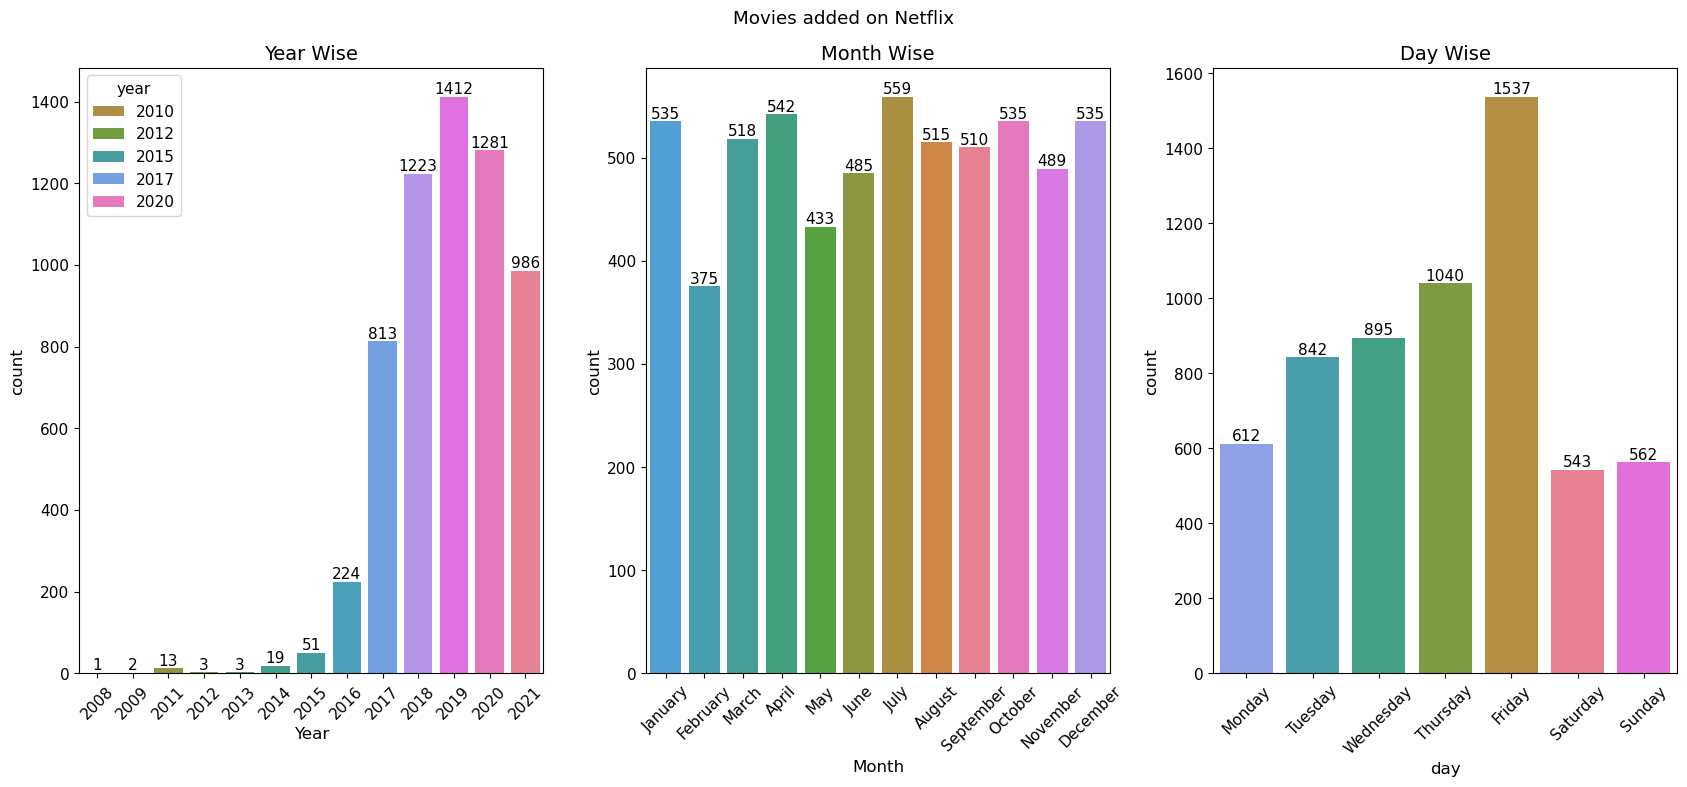

In [72]:
plt.figure(figsize=(17,8))
plt.suptitle("Movies added on Netflix")


plt.subplot(1,3,1)
label = sns.countplot(data= df_movies_temp, x = 'year', order = mv_year.index, hue= "year", palette='husl')
 
for i in label.containers:
    label.bar_label(i)

plt.xticks(rotation= 45)
plt.xlabel("Year")
plt.title('Year Wise')


plt.subplot(1,3,2)
label = sns.countplot(data= df_movies_temp, x = 'month_name', order = mv_month.index, hue= "month_name", palette='husl')

for i in label.containers:
    label.bar_label(i)

plt.xticks(rotation= 45)
plt.xlabel("Month")
plt.title('Month Wise')


plt.subplot(1,3,3)
label = sns.countplot(data= df_movies_temp, x = 'weekday', order = mv_day.index, hue= "weekday", palette='husl')

for i in label.containers:
    label.bar_label(i)

plt.xticks(rotation= 45)
plt.xlabel("day")
plt.title('Day Wise')
plt.show()

### **`8. Temporal Analysis: TV Shows Added Over Time`**
Similar to movies, this section tracks the addition patterns for TV shows to identify differences in release strategies.

Text(0.5, 1.0, 'Day Wise')

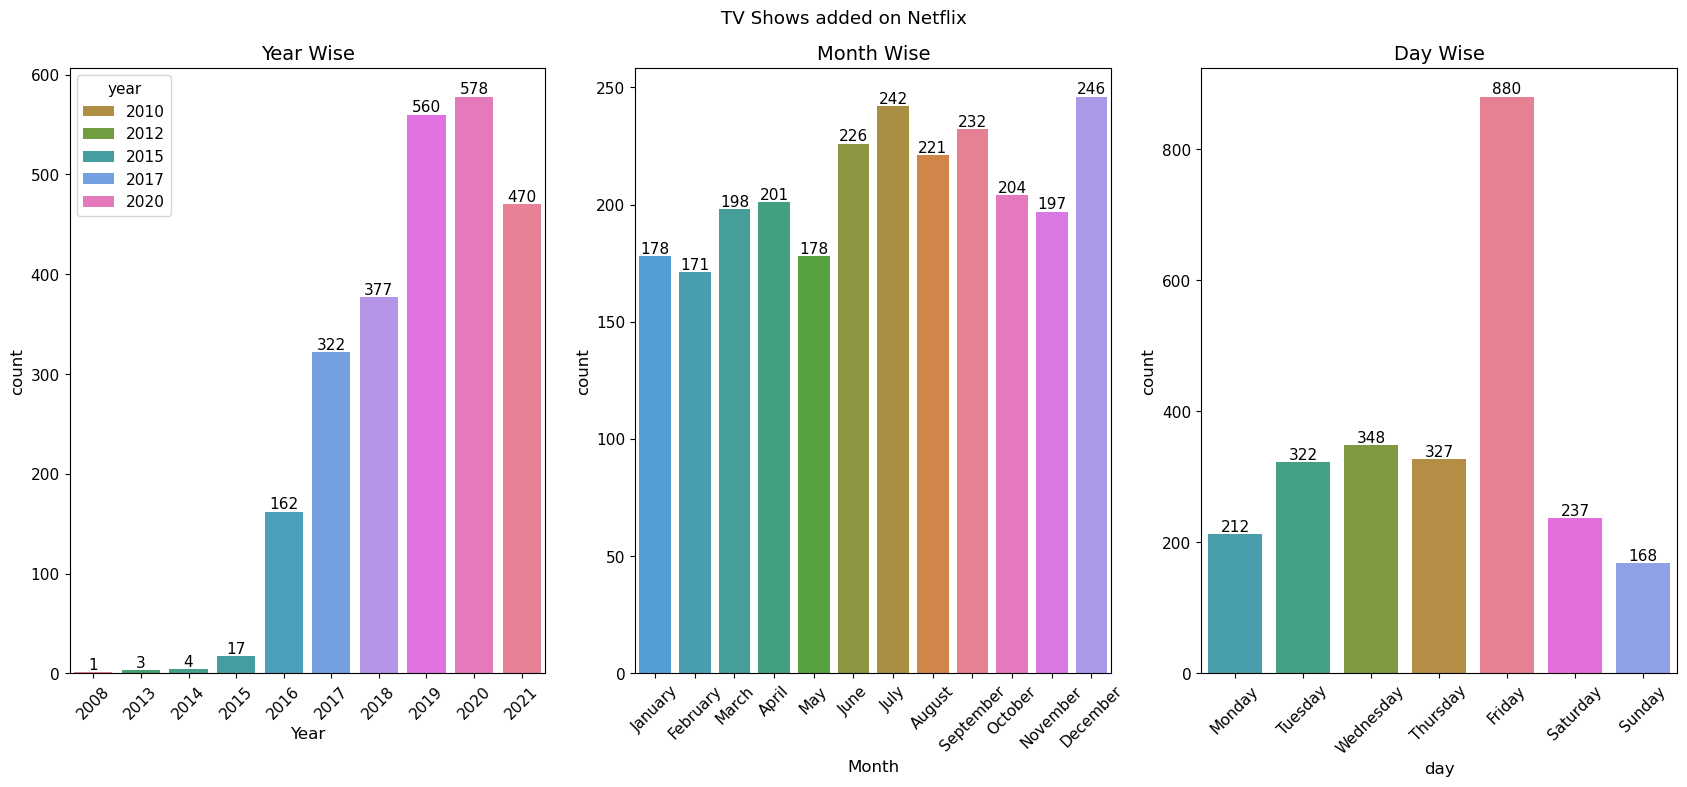

In [73]:
df_tvs_temp = df_tvs.drop_duplicates(subset= ['year', 'title'])

tv_year = df_tvs_temp['year'].value_counts()
tv_year.sort_index(inplace= True)

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
tv_month = df_tvs_temp['month_name'].value_counts().loc[month_order]

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
tv_day = df_tvs_temp['weekday'].value_counts().loc[day_order]

plt.figure(figsize=(17,8) )
plt.suptitle("TV Shows added on Netflix")


plt.subplot(1,3,1)
label = sns.countplot(data= df_tvs_temp, x = 'year', order = tv_year.index, hue= "year", palette='husl')

for i in label.containers:
    label.bar_label(i)

plt.xticks(rotation= 45)
plt.xlabel("Year")
plt.title('Year Wise')


plt.subplot(1,3,2)
label = sns.countplot(data= df_tvs_temp, x = 'month_name', order = tv_month.index, hue= "month_name", palette='husl')

for i in label.containers:
    label.bar_label(i)

plt.xticks(rotation= 45)
plt.xlabel("Month")
plt.title('Month Wise')


plt.subplot(1,3,3)
label = sns.countplot(data= df_tvs_temp, x = 'weekday', order = tv_day.index, hue= "weekday", palette='husl')

for i in label.containers:
    label.bar_label(i)

plt.xticks(rotation= 45)
plt.xlabel("day")
plt.title('Day Wise')

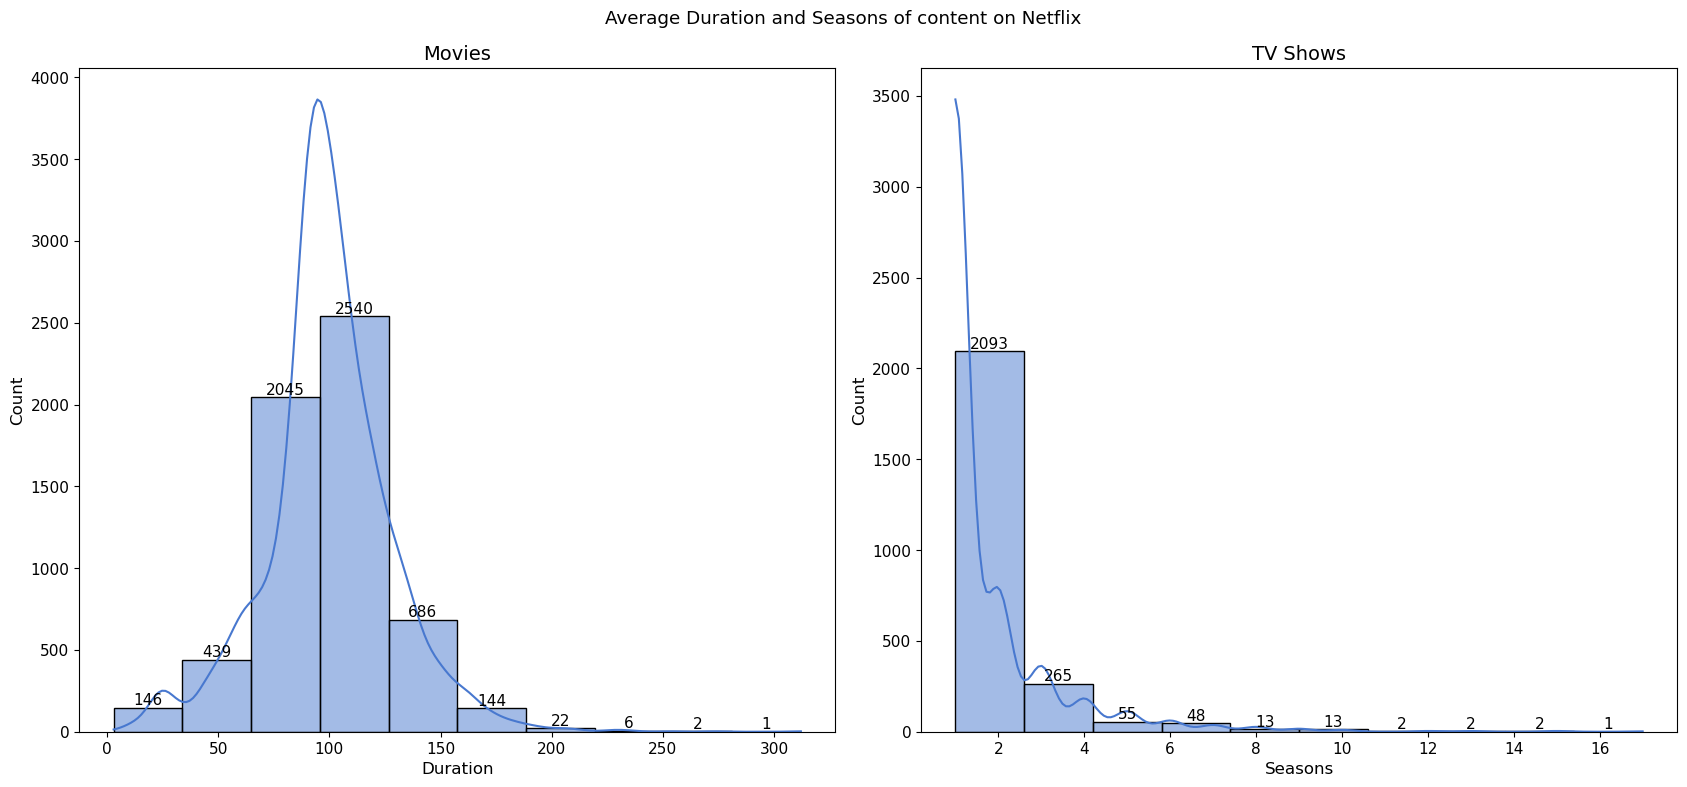

In [70]:
df_movies_temp = df_movies.drop_duplicates(subset= ['duration', 'title'])
df_tvs_temp = df_tvs.drop_duplicates(subset= ['seasons', 'title'])

plt.figure(figsize=(17,8) )
plt.suptitle("Average Duration and Seasons of content on Netflix")


plt.subplot(1,2,1)
label= sns.histplot(df_movies_temp['duration'].astype(int), bins= 10, kde = True)

for i in label.containers:
    label.bar_label(i)

plt.xlabel("Duration")
plt.title('Movies')

plt.subplot(1,2,2)
label= sns.histplot(df_tvs_temp['seasons'].astype(int), bins= 10, kde = True)

for i in label.containers:
    label.bar_label(i)

plt.xlabel("Seasons")
plt.title('TV Shows')

plt.show()

### **`9. Content Duration and Seasonality`**
Finally, we use boxplots to visualize the distribution of movie lengths (minutes) and the number of seasons for TV shows to identify the 'typical' content length.

C:\Users\JUNAID\AppData\Local\Temp\ipykernel_10840\263490956.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies_temp['duration'] = df_movies_temp['duration'].astype(int)
C:\Users\JUNAID\AppData\Local\Temp\ipykernel_10840\263490956.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tvs_temp['seasons'] = df_tvs_temp['seasons'].astype(int)


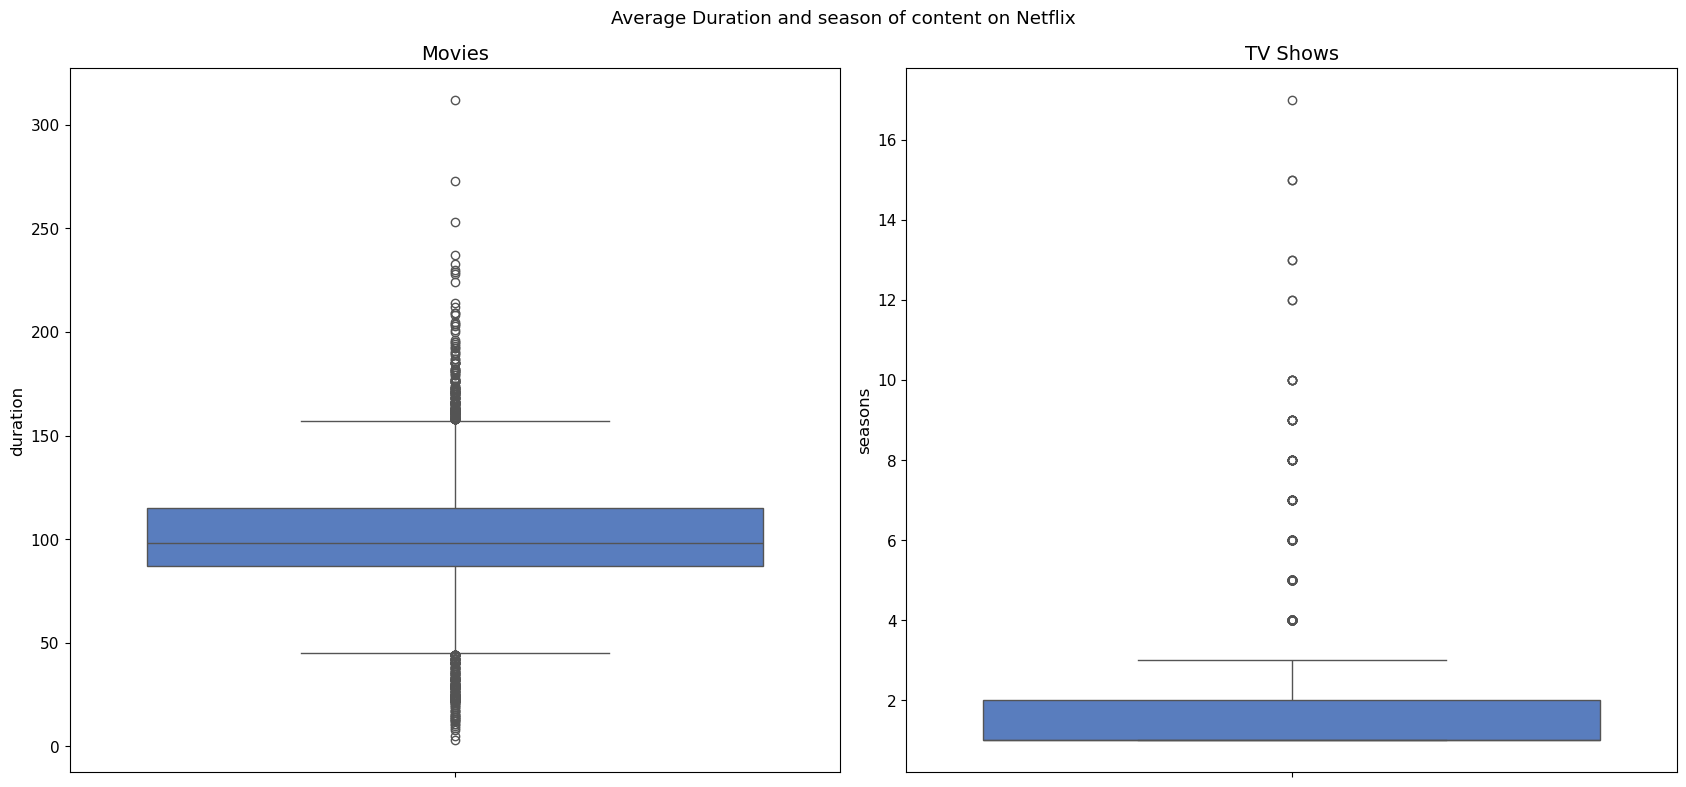

In [74]:
df_movies_temp['duration'] = df_movies_temp['duration'].astype(int)
df_tvs_temp['seasons'] = df_tvs_temp['seasons'].astype(int)

plt.figure(figsize=(17,8))
plt.suptitle('Average Duration and season of content on Netflix')

plt.subplot(1,2,1)
sns.boxplot(y = df_movies_temp['duration'])
plt.title("Movies")

plt.subplot(1,2,2)
sns.boxplot(y = df_tvs_temp['seasons'])
plt.title("TV Shows")

plt.show()

# <span style="color: red;background-color:yellow">`Final Insights and Findings`</span>

Based on the comprehensive analysis of the Netflix dataset, the following strategic insights have been identified:

- Library Composition: Movies remain the dominant format (over 60% of the library). However, the rising number of TV Shows suggests a shift toward high-engagement, "bingeable" episodic content to reduce subscriber churn.

- The 2015 Pivot: There is a clear inflection point in 2015. Content additions increased exponentially after this year, marking Netflix's aggressive transition into a global production powerhouse.

- Market Concentration: While Netflix is global, production is highly concentrated. The USA, India, and the UK are the top three contributors. This highlights a dual strategy: maintaining a strong Hollywood core while investing heavily in high-growth markets like Bollywood.

- Demographic Targeting: The catalog is heavily skewed toward Adult and Teens. This suggests Netflix targets the "independent viewer" demographic rather than competing solely in the family/children’s space dominated by platforms like Disney+.

- Complexity & Collaboration: The prevalence of multi-genre and multi-country listings indicates that "International" and "Cross-genre" (e.g., Sci-Fi Thrillers) content is a cornerstone of the platform's global appeal.

---

# <span style="color: red;background-color:yellow">`Strategic Recommendations`</span>

    Diversify Production: While the US and India lead, there is significant opportunity to expand original productions in emerging markets like South Korea and Spain, which have shown high global "crossover" potential.

    Release Timing: Data shows a preference for Friday releases. Netflix should continue this trend to capture maximum weekend viewership but could experiment with "mid-week drops" for smaller niche genres to avoid internal competition.

---
---